# 2016 US Bike Share Activity Snapshot

In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [2]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

In [3]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if city == 'NYC' or city == 'Chicago':
        duration = float(datum['tripduration'])/60       
    else:
        duration = (float(datum['Duration (ms)'])/ 1000) / 60
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    # YOUR CODE HERE
    if city == 'NYC':
        #'1/1/2016 00:09:55'
        time=datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M:%S')
    elif city == 'Washington':
        #'3/31/2016 22:57'
        time=datetime.strptime(datum['Start date'],'%m/%d/%Y %H:%M')
    else:
        #'3/31/2016 23:30'
        time=datetime.strptime(datum['starttime'], '%m/%d/%Y %H:%M')
        
    month=time.month
    hour=time.hour
    
    #representing the days of the week
    import calendar
    day_of_week=calendar.day_name[time.weekday()]

    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [5]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    
    if city == 'NYC' or city == 'Chicago':
        user_type = datum['usertype']
    else:
        user_type=datum['Member Type']
        if user_type=="Registered":
            user_type='Subscriber'
        else:
            user_type='Customer'
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

In [6]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above. ##
            new_point['duration']=duration_in_mins(row, city)
            newtime=time_of_trip(row, city)
            new_point['month']=newtime[0]
            new_point['hour']=newtime[1]
            new_point['day_of_week']=newtime[2]
            new_point['user_type']=type_of_user(row, city)

            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


In [8]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        subscribersـproportion = (n_subscribers / n_total) * 100
        n_customers_proportion = (n_customers / n_total) * 100
        
        # return tallies as a tuple
        return(n_total, subscribersـproportion, n_customers_proportion)

In [9]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']
for data_file in data_files:
    print(number_of_trips(data_file))

(72131, 76.22520136973007, 23.774798630269924)
(276798, 88.83590199351151, 11.164098006488485)
(66326, 78.0282242257938, 21.971775774206193)


In [10]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##

def average_trip_length(filename):
    """
    This function reads in a file with trip data 
    and reports the average trip length for each city.
    """
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        trips_num=0
        trips_sum=0
        for row in reader:
            trips_num += 1
            trips_sum+=float(row['duration'])
        average = trips_sum/trips_num
        return average
    

In [11]:
data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']
for data_file in data_files:
    print(average_trip_length(data_file))

16.563629368787335
15.81259299802294
18.93287355913721


In [12]:
def longer_than_30minute_trips_avg(filename):
    """
    This function reads in a file with trip data and reports 
    proportion of rides made in each city are longer than 30 minutes.
    """
    with open(filename, 'r') as f_in:
        reader = csv.DictReader(f_in)
        trips_num=0
        longer_trips=0
        for row in reader:
            trips_num+=1
            if float(row['duration']) > 30:
                longer_trips+=1
        proportion = (longer_trips/trips_num)*100
        return proportion

In [13]:
data_files = ['./data/Chicago-2016-Summary.csv',
              './data/NYC-2016-Summary.csv',
              './data/Washington-2016-Summary.csv']
for data_file in data_files:
    print(longer_than_30minute_trips_avg(data_file))

8.332062497400562
7.3024371563378345
10.83888671109369


In [14]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def average_comparison(data_file):
    """
    This function reads in a file with trip data 
    and reports which type of user takes longer rides on average:
    Subscribers or Customers
    """
    num_of_users=number_of_trips(data_file)
    
    Customer_average=num_of_users[2]/100
    Subscriber_average=num_of_users[1]/100
    
    return Customer_average, Subscriber_average

In [15]:
data_file ='./data/Washington-2016-Summary.csv'
print(average_comparison(data_file))

(0.21971775774206193, 0.7802822422579381)


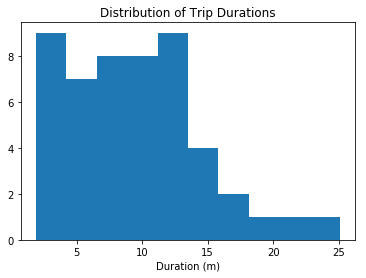

In [16]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

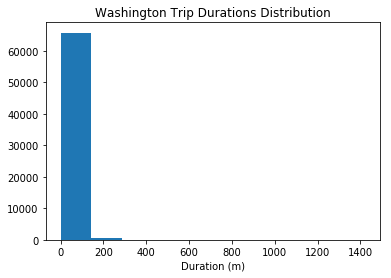

In [17]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

import pandas as pd
selected_city_data = pd.read_csv('./data/Washington-2016-Summary.csv')
trip_time_list = list(selected_city_data.duration)

plt.hist(trip_time_list)
plt.title('Washington Trip Durations Distribution')
plt.xlabel('Duration (m)')
plt.show()


In [18]:
## Use this and additional cells to answer Question 5. ##
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import numpy as np

def plot(filename):
    """
    This function reads in a file with trip data and plots the number of
    trips made by subscribers, customers
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        subscribers = []
        customers = []
        for row in reader:
            if row['user_type'] == 'Subscriber':
                subscribers.append(float(row['duration']))
            else:
                customers.append(float(row['duration']))


    plt.hist(subscribers, range = (0,75))
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.title('Washington subscribers trip duration Distribution')
    plt.xlabel('Duration (m)')
    plt.show()
 
    plt.hist(customers, range = (0,75))
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    plt.title('Washington customers trip duration Distribution')
    plt.xlabel('Duration (m)')
    plt.show()

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


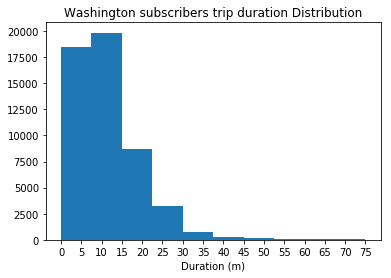

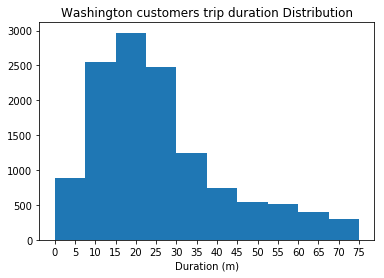

None


In [19]:
data_file ='./data/Washington-2016-Summary.csv'
print(plot(data_file))

In [31]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.              ##

def day_of_week_plot(data_file,user_type):
    with open(data_file, 'r') as f_in:
        reader = csv.DictReader(f_in)
        day_of_week=[]
        for row in reader:
            if row['user_type']== user_type:
                day_of_week.append(row['day_of_week'])
    %matplotlib inline 
    plt.hist(day_of_week)
    plt.title('Washington days trips distribution for '+ user_type)
    plt.xlabel('day_of_week')
    plt.show()

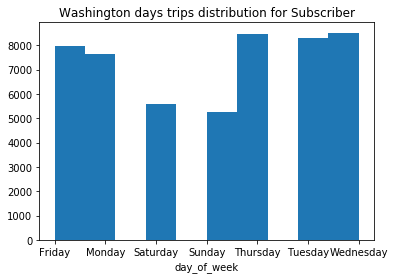

None


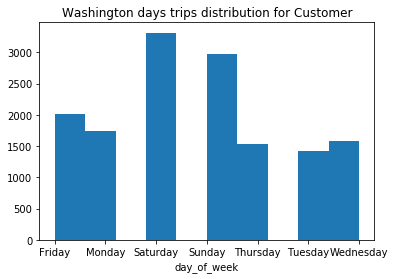

None


In [33]:
data_file = './data/Washington-2016-Summary.csv'
print(day_of_week_plot(data_file,"Subscriber"))
print(day_of_week_plot(data_file,"Customer"))